In [1]:
import pandas as pd


In [3]:
df = pd.read_csv("./test_data/Salaries.csv")
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
df["BasePay"].mean()


66325.4488404877

In [7]:
df["OvertimePay"].max()

245131.88

In [9]:
df[df["EmployeeName"]=="JOSEPH DRISCOLL"]["JobTitle"]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [10]:
df2 = df[df["EmployeeName"]=="JOSEPH DRISCOLL"]
df2["TotalPayBenefits"]

24    270324.91
Name: TotalPayBenefits, dtype: float64

In [11]:
df2["TotalPay"]

24    270324.91
Name: TotalPay, dtype: float64

In [12]:
df2["Benefits"]

24   NaN
Name: Benefits, dtype: float64

In [13]:
df [df["TotalPayBenefits"] == df["TotalPayBenefits"].max()]["EmployeeName"]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

average BasePay of all employees per year? (2011-2014)

In [18]:
df[ (df["Year"] > 2011) & (df["Year"] < 2014)]["BasePay"].mean()

67539.89836322475

In [19]:
df.groupby("Year")["BasePay"].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [20]:
df[ (df["Year"] > 2011) & (df["Year"] < 2014)].groupby("Year")["BasePay"].mean()

Year
2012    65436.406857
2013    69630.030216
Name: BasePay, dtype: float64

In [25]:
df["JobTitle"].unique().shape


(2159,)

In [32]:
df3 = df.groupby("JobTitle")["Id"].count().sort_values(ascending=False)

In [34]:
df3.iloc[:6]

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
Name: Id, dtype: int64

Job Titles with only one occurence in 2013

In [41]:
df2 = df[df["Year"] ==2013]

In [53]:
df3 = df2.groupby("JobTitle")["Id"].count().sort_values()

df4 = df3[df3.value ==1]

In [58]:
df3

JobTitle
Real Estate Devt. Mgr, SFMTA       1
Special Assistant 15               1
Trnst Power Line Wrk Sprv 2        1
Special Assistant 16               1
Board Scty, MTA                    1
                                ... 
Custodian                        789
Public Svc Aide-Public Works     859
Registered Nurse                1231
Special Nurse                   1445
Transit Operator                2295
Name: Id, Length: 1051, dtype: int64

In [64]:
df4 = df3[df3.values ==1]

In [65]:
df4.shape


(202,)

people have the word Chief in their job title

(2159,)

In [104]:
ar2 = df[df["JobTitle"].str.contains("Chief")].groupby("JobTitle").count()["Id"]

In [105]:
ar2.sum()

423

In [ ]:
df["contain_chief"] = df["JobTitle"].str.contains("chief")

In [109]:
df.groupby("JobTitle")["contain_chief"].sum()

JobTitle
ACCOUNT CLERK                                     0
ACCOUNTANT                                        0
ACCOUNTANT INTERN                                 0
ACPO,JuvP, Juv Prob (SFERS)                       0
ACUPUNCTURIST                                     0
                                                 ..
X-RAY LABORATORY AIDE                             0
X-Ray Laboratory Aide                             0
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    0
Youth Comm Advisor                                0
ZOO CURATOR                                       0
Name: contain_chief, Length: 2159, dtype: int64

In [119]:
df[df["contain_chief"] ==True]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,contain_chief


In [115]:
def chief_string(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

In [116]:
sum(df['JobTitle'].apply(lambda x: chief_string(x)))

627

In [120]:
df["chief_str"]=df['JobTitle'].apply(lambda x: chief_string(x))

In [121]:
df[df["chief_str"] ==True]


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,contain_chief,chief_str
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,False,True
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN,False,True
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN,False,True
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN,False,True
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138011,138012,Sharon C Jackson,Chief Deputy Adlt Probation Of,56660.18,0.00,0.00,566.61,56660.18,57226.79,2014,NaN,San Francisco,NaN,False,True
139620,139621,Anita S Lee,Chief Clerk,38598.86,0.00,0.00,386.00,38598.86,38984.86,2014,NaN,San Francisco,NaN,False,True
139709,139710,George D Vaughan,Chief Nursery Specialist,27319.47,483.90,0.00,10334.67,27803.37,38138.04,2014,NaN,San Francisco,NaN,False,True
140080,140081,Patrick W Gillespie,Chief Preparator,24091.00,0.00,0.00,10176.77,24091.00,34267.77,2014,NaN,San Francisco,NaN,False,True


In [135]:
!pwd

/Volumes/GoogleDrive/My Drive/SkillsLearningTraining/tutorials-python/main/pandas


In [136]:
%ls

basics_part1.ipynb  test_data/


In [137]:
purch = pd.read_csv("./test_data/purchase.csv")

In [138]:
purch.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [140]:
purch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [141]:
purch["Purchase Price"].mean()

50.347302

In [143]:
purch["Purchase Price"].max()


99.99

In [144]:
purch["Purchase Price"].min()

0.0

In [148]:
purch[purch["Job"]=="Lawyer"]["Email"].count()

30

In [149]:
purch["AM or PM"].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [152]:
purch.groupby("Job").count()["Email"].sort_values(ascending=False).head(5)

Job
Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Designer, jewellery                  27
Research officer, political party    27
Name: Email, dtype: int64

In [153]:
purch[purch["Lot"] == "90 WT"]["Purchase Price"]

513    75.1
Name: Purchase Price, dtype: float64

In [156]:
len(purch[(purch["CC Provider"]== "American Express") &(purch["Purchase Price"]>= 95)])

39

In [157]:
purch.head(3)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95


In [162]:
purch["expire_2025"]=purch["CC Exp Date"].apply(lambda x: int(x.split("/")[1]==25))

In [163]:
purch["expire_2025"].count()

10000

In [166]:
func = lambda x: int(x.split("/")[1])==25


In [168]:
func("11/23")

False

In [171]:
purch["CC Exp Date"].apply(func).sum()

1033

In [172]:
purch["email_provider"]=purch["Email"].apply(lambda x: x.split("@")[1])

In [178]:
purch.groupby("email_provider").count()["Email"].sort_values(ascending=False).head(5)

email_provider
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
sns.set_style('whitegrid')

In [182]:
titanic = sns.load_dataset('titanic')

In [183]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


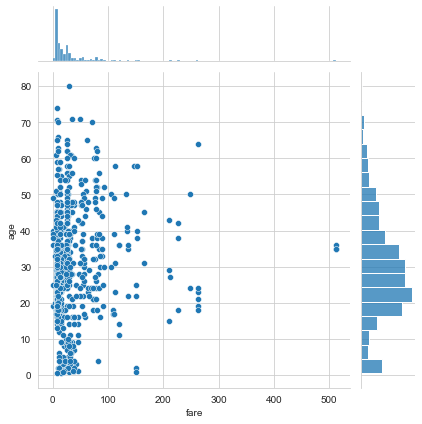

In [186]:
sns.jointplot(x="fare", y="age", data=titanic)

<AxesSubplot:xlabel='fare', ylabel='Count'>

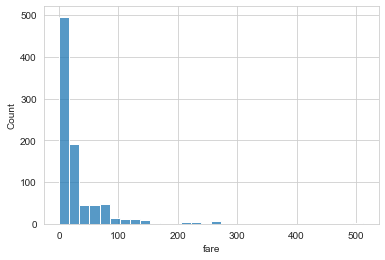

In [195]:
sns.histplot(x= "fare", bins=30, data=titanic)

<AxesSubplot:xlabel='fare', ylabel='Count'>

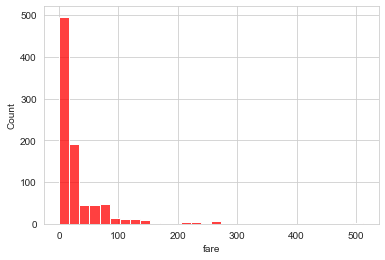

In [198]:
sns.histplot(titanic["fare"], bins=30, kde=False, color="red")

<AxesSubplot:xlabel='class', ylabel='age'>

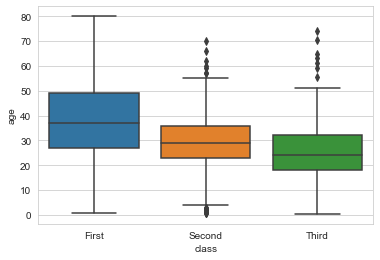

In [201]:
sns.boxplot(y="age", x="class", data=titanic)

<AxesSubplot:xlabel='sex', ylabel='Count'>

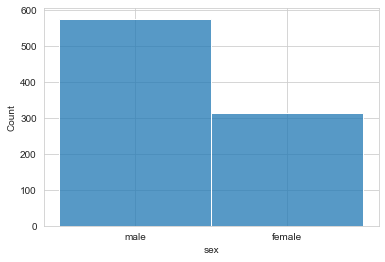

In [202]:
sns.histplot(titanic["sex"])

<AxesSubplot:xlabel='sex', ylabel='count'>

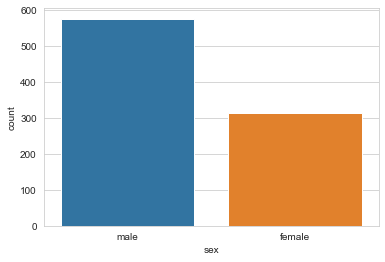

In [204]:
sns.countplot(x= "sex", data=titanic)

<AxesSubplot:>

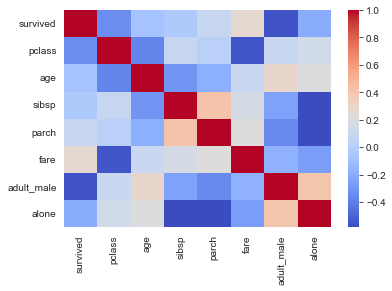

In [205]:
sns.heatmap(titanic.corr(),cmap='coolwarm')


<AxesSubplot:xlabel='age', ylabel='count'>

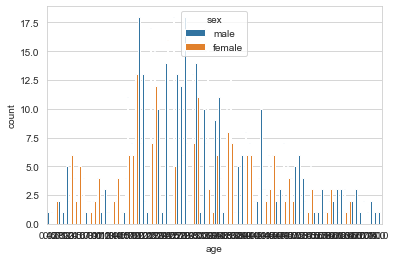

In [207]:
sns.countplot(x="age", hue = "sex", data=titanic)

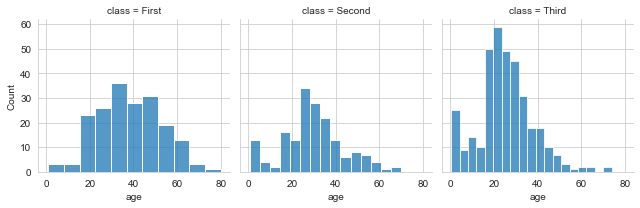

In [211]:
g = sns.FacetGrid(data=titanic,col='class')
g.map(sns.histplot,'age')